<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/ResNet50_experiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Allows loading of operating system
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [ ]:
## fucntion to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [ ]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [ ]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [ ]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


## Loading the train dataset

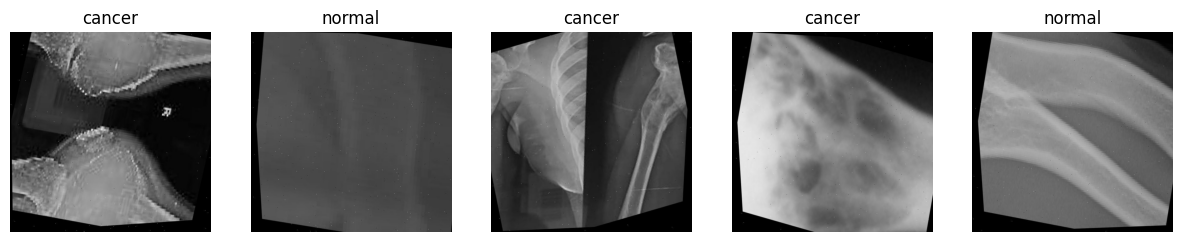

In [ ]:


# Get classes (subfolders)
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


## checking images in the test dataset

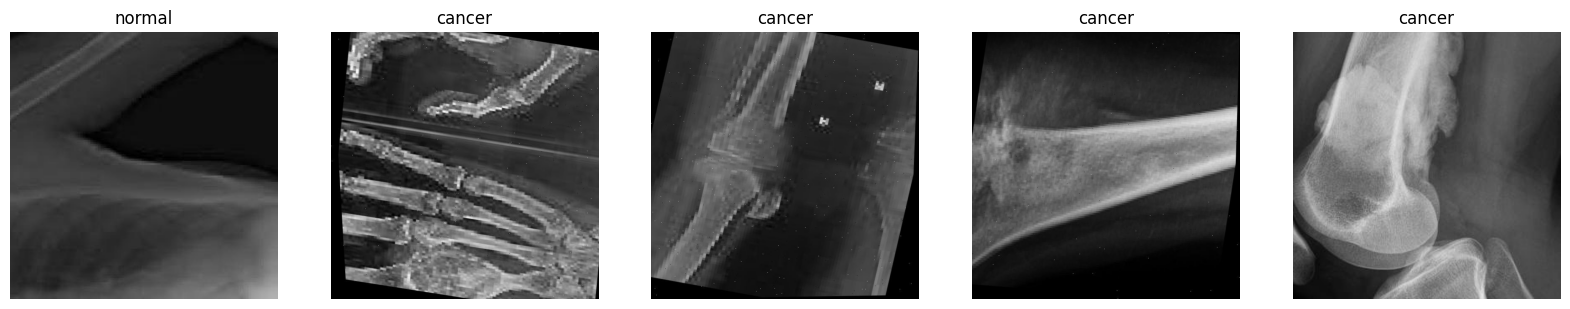

In [ ]:


# Get classes (subfolders)
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


## Validation dataset

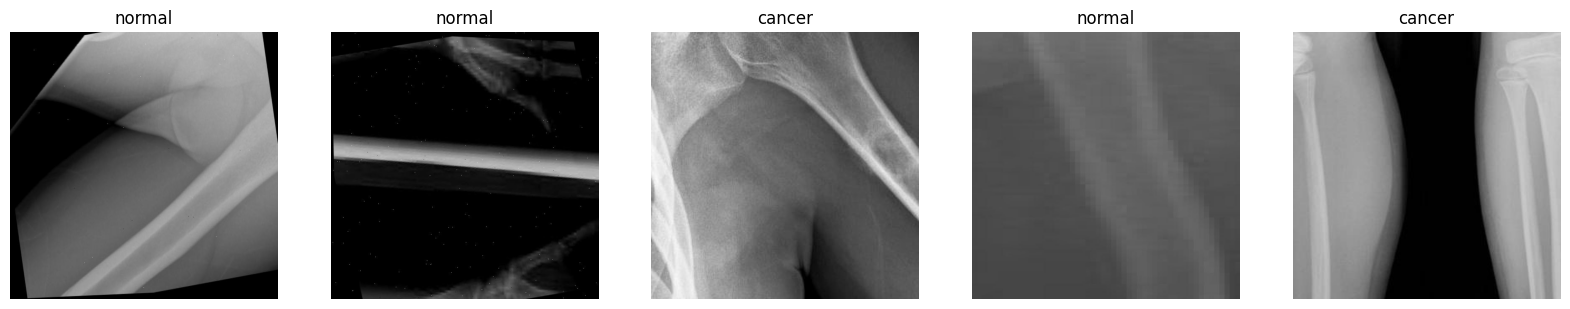

In [ ]:


# Get classes (subfolders)
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


## Exploratory data analysis (EDA)
visualization of the train

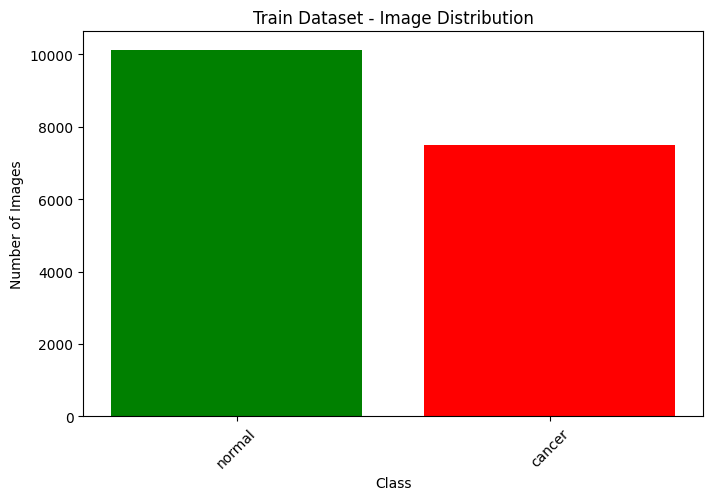

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



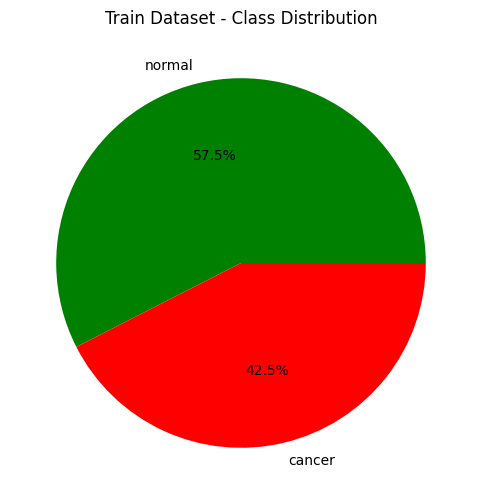

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

## visualization of test dataset

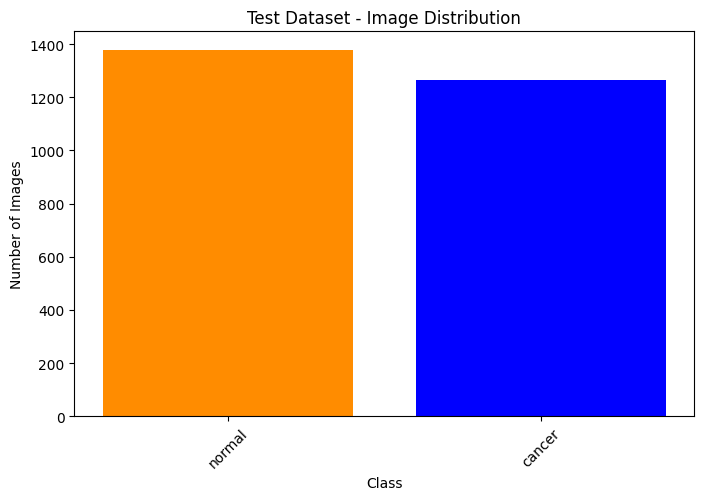

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



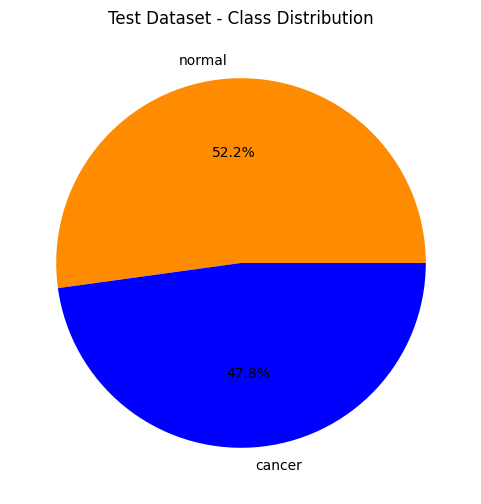

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

## Visualizing the validation dataset

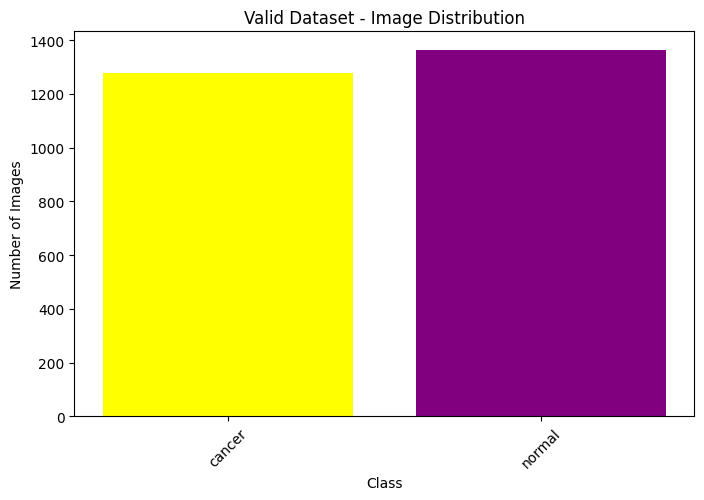

In [ ]:
# Count images in each class
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



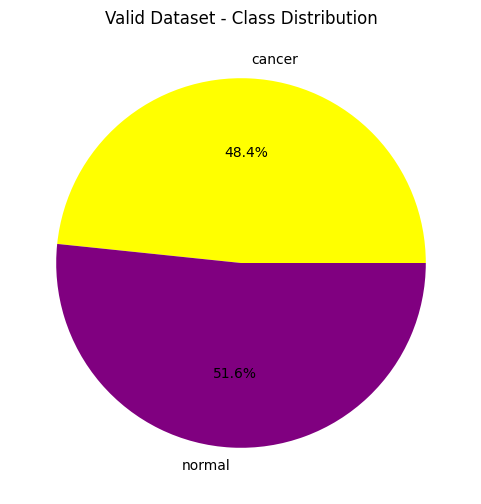

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [ ]:
# Function to load data from the given directory
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

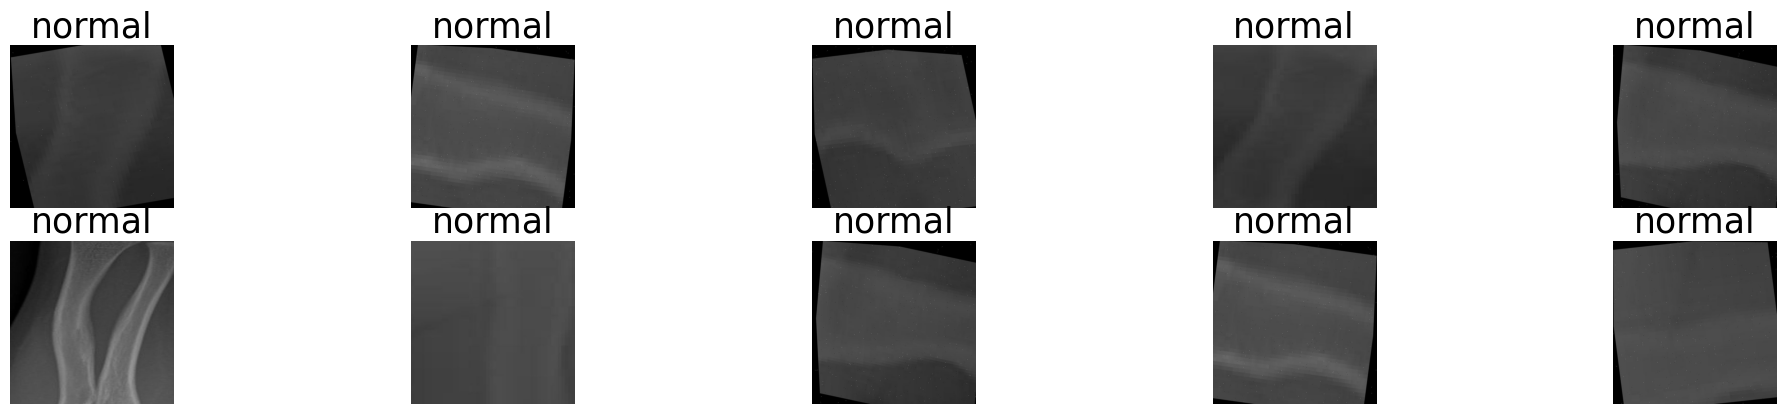

In [ ]:
import pandas as pd
# Load data into a DataFrame
train_df = data(train_dataset)
plt.figure(figsize=(25, 25))
for n, i in enumerate(np.random.randint(0, len(train_dataset), 10)):
    plt.subplot(10, 5, n + 1)
    img = cv2.imread(train_df.image[i])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(train_df.label[i], fontsize=25)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (224, 224)
batch_size = 32

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)

#  Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)

# Load data into a DataFrame for validation data
valid_df = data(valid_dataset) # defining the valid_df DataFrame

#  Validation generator
valid_generator = test_val_datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=valid_dataset
)


# Load data into a DataFrame for test data
test_df = data(test_dataset)  # defining the test_df DataFrame

#  Test generator
test_generator = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)

Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, ZeroPadding2D, MaxPooling2D
from tensorflow.keras.models import Model

def bottleneck_block(x, filters, stride=1, downsample=False):
    shortcut = x

    # 1x1 conv to reduce dimensions
    x = Conv2D(filters, (1, 1), strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 3x3 conv
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 1x1 conv to restore dimensions
    x = Conv2D(filters * 4, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut path
    if downsample or shortcut.shape[-1] != filters * 4:
        shortcut = Conv2D(filters * 4, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet50(input_shape=(224, 224, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    x = ZeroPadding2D(padding=(3, 3))(inputs)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='valid')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Conv2_x
    for _ in range(3):
        x = bottleneck_block(x, 64)

    # Conv3_x
    x = bottleneck_block(x, 128, stride=2, downsample=True)
    for _ in range(3):
        x = bottleneck_block(x, 128)

    # Conv4_x
    x = bottleneck_block(x, 256, stride=2, downsample=True)
    for _ in range(5):
        x = bottleneck_block(x, 256)

    # Conv5_x
    x = bottleneck_block(x, 512, stride=2, downsample=True)
    for _ in range(2):
        x = bottleneck_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    output = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, output)
    return model

# Build model
model = build_resnet50()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,472 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │          4,160 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 256)    │         16,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 256)    │          1,024 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.callbacks import Callback

In [ ]:
## Adding hyperparameter tunning to the model
class SpecificityAtSensitivityCallback(Callback):
    def __init__(self, val_data, sensitivity_threshold=0.95):
        super(SpecificityAtSensitivityCallback, self).__init__()
        self.val_data = val_data
        self.sensitivity_threshold = sensitivity_threshold
        self.val_specificity_at_sensitivity = 0

    def on_epoch_end(self, epoch, logs=None):
        val_preds = []
        val_true = []

        for i in range(len(self.val_data)):
            x, y = self.val_data[i]
            val_preds.extend(self.model.predict(x).ravel())
            val_true.extend(y)

        fpr, tpr, _ = roc_curve(val_true, val_preds)
        specificity = 1 - fpr
        sensitivity = tpr

        specificity_at_sensitivity = specificity[np.argmax(sensitivity >= self.sensitivity_threshold)]
        val_auc = roc_auc_score(val_true, val_preds)

        print(f"\nEpoch {epoch + 1}: val_auc = {val_auc:.4f}, val_specificity_at_sensitivity = {specificity_at_sensitivity:.4f}")

        logs['val_auc'] = val_auc
        logs['val_specificity_at_sensitivity'] = specificity_at_sensitivity

In [ ]:
specificity_callback = SpecificityAtSensitivityCallback(valid_generator, sensitivity_threshold=0.95)

In [ ]:
# Train the model with the custom callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[specificity_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(test_generator, verbose=1)

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test AUC: {test_auc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 994s 12s/step - accuracy: 0.4645 - auc: 0.4237 - loss: 1.1990
Test Loss: 0.7899
Test Accuracy: 65.99%
Test AUC: 0.8633


In [ ]:
hist_ = pd.DataFrame(history.history)
hist_

,accuracy,auc,loss,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity
0,0.788627,0.870562,0.471774,0.600991,0.876364,0.623303,0.397496
1,0.843750,0.913043,0.507888,0.585747,0.876709,0.640264,0.406886
2,0.806995,0.893760,0.407130,0.472561,0.297939,6.034836,0.040689
3,0.812500,0.900810,0.406229,0.473704,0.355668,3.845428,0.064945
4,0.818311,0.904445,0.384324,0.793826,0.919198,0.451086,0.634585
5,0.906250,0.984314,0.206741,0.778963,0.912806,0.479086,0.601721
6,0.818425,0.905287,0.384654,0.859756,0.930272,0.336587,0.618153
7,0.812500,0.931174,0.372025,0.858994,0.930344,0.337415,0.618936
8,0.822917,0.910818,0.369871,0.676448,0.868094,0.737558,0.510172
9,0.843750,0.906746,0.351175,0.675686,0.867043,0.754105,0.507825


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

83/83 ━━━━━━━━━━━━━━━━━━━━ 24s 250ms/step


83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step


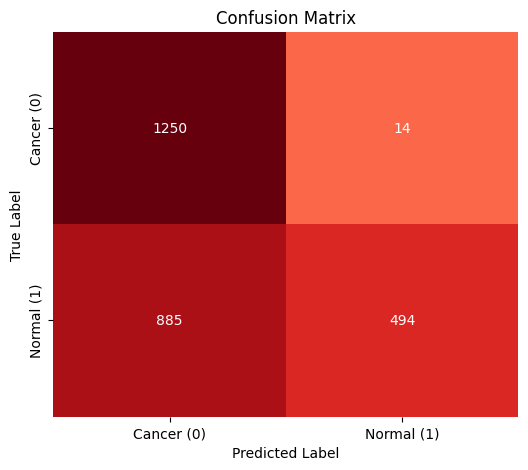

In [ ]:
y_test = test_generator.labels
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Reds',
            xticklabels=['Cancer (0)', 'Normal (1)'],
            yticklabels=['Cancer (0)', 'Normal (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer (0)', 'Normal (1)'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

  Cancer (0)       0.59      0.99      0.74      1264
  Normal (1)       0.97      0.36      0.52      1379

    accuracy                           0.66      2643
   macro avg       0.78      0.67      0.63      2643
weighted avg       0.79      0.66      0.62      2643



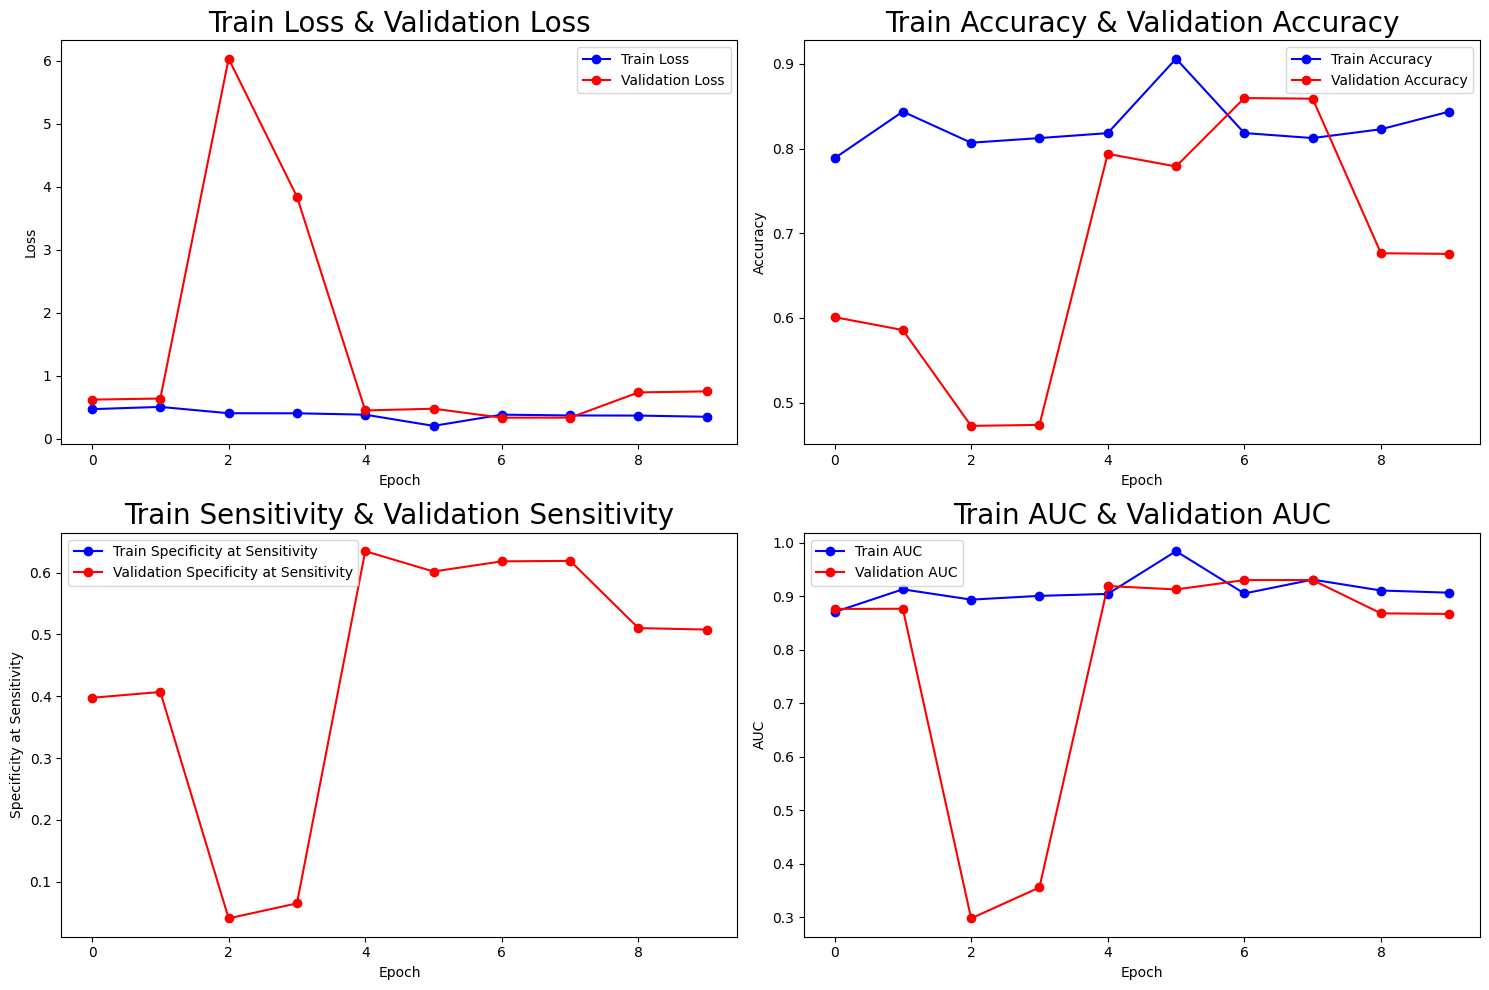

In [ ]:
##Training and validation loss
hist_ = history.history
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(hist_['loss'], 'b-o', label='Train Loss')
plt.plot(hist_['val_loss'], 'r-o', label='Validation Loss')
plt.title('Train Loss & Validation Loss', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
## Training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(hist_['accuracy'], 'b-o', label='Train Accuracy')
plt.plot(hist_['val_accuracy'], 'r-o', label='Validation Accuracy')
plt.title('Train Accuracy & Validation Accuracy', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Training and validation auc
plt.subplot(2, 2, 3)
plt.plot(hist_.get('specificity_at_sensitivity', []), 'b-o', label='Train Specificity at Sensitivity')
plt.plot(hist_.get('val_specificity_at_sensitivity', []), 'r-o', label='Validation Specificity at Sensitivity')
plt.title('Train Sensitivity & Validation Sensitivity', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('Specificity at Sensitivity')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(hist_['auc'], 'b-o', label='Train AUC')
plt.plot(hist_['val_auc'], 'r-o', label='Validation AUC')
plt.title('Train AUC & Validation AUC', fontsize=20)
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator).ravel()
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
auc_score = roc_auc_score(y_true, y_pred_probs)

83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step


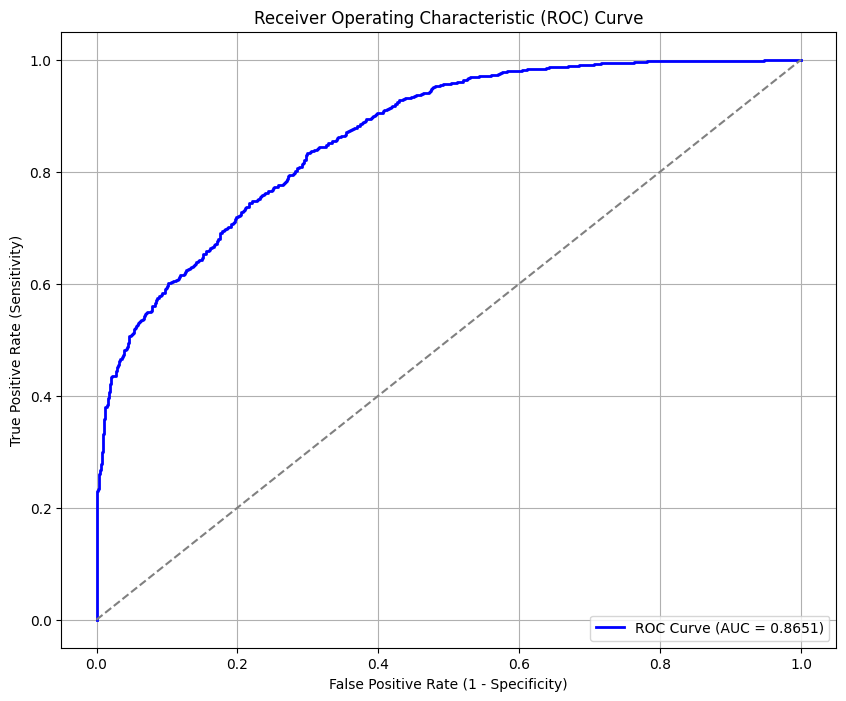

In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 188ms/step


,Actual,Prediction
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,0
2640,0,0
2641,0,0
